In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
 
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print command[output_ext]
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)

/Users/anuragmakineni/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
T1 = np.linspace(-100.0, 100.0, 100)
T2 = np.linspace(-100.0, 100.0, 100)
r = 0.5
Rg = 0.5

In [5]:
force_x = []
force_y = []
moment = []
for T1 in np.linspace(-100.0, 100.0, 100):
    for T2 in np.linspace(-100.0, 100.0, 100):
        force_x.append(T1 + T2)
        force_y.append(0)
        moment.append(-r*T1 + r*T2)
        
force_x_2 = []
force_y_2 = []
moment_2 = []
for theta in np.linspace(-np.pi/2, np.pi/2, 100):
    for T in np.linspace(-200.0, 200.0, 100):
        force_x_2.append(T*np.cos(theta))
        force_y_2.append(T*np.sin(theta))
        moment_2.append(Rg * T*np.sin(theta))

<IPython.core.display.Javascript object>


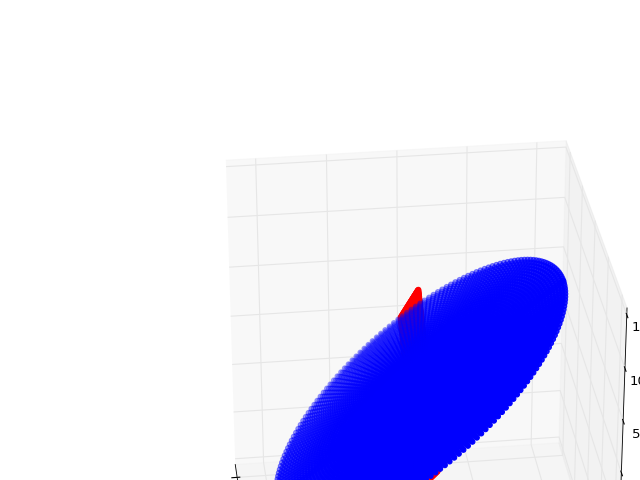

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(force_x, force_y, moment, c='r', marker='o', edgecolor='r')
ax.scatter(force_x_2, force_y_2, moment_2, c='b', marker='o', edgecolor='b')
plt.axis('equal')
ax.set_xlabel('$F_x$ (N)')
ax.set_ylabel('$F_y$ (N)')
ax.set_zlabel('$M_z$ (N-m)')
plt.show()

In [7]:

angles = np.linspace(0,360,51)[:-1] # Take 20 angles between 0 and 360
 # create an animated gif (20ms between frames)
rotanimate(ax, angles,'movie.gif',delay=50, width=10, height=10)